In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Задание 1 
## Загрузите файл HR.csv в pandas dataframe 

In [54]:
df = pd.read_csv('HR.csv')
# df = df.drop_duplicates() Имеются дубликаты, полагаю существует вероятность того, что это разные люди. Без идентификаторов каждого работника я не смогу это определить.
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Расчёт основных статистических показателей для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [55]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [56]:
df.drop(columns=['department', 'salary']).median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [57]:
df.apply(lambda x: x.mode()[0])
# df.mode()

satisfaction_level         0.1
last_evaluation           0.55
number_project               4
average_montly_hours       135
time_spend_company           3
Work_accident                0
left                         0
promotion_last_5years        0
department               sales
salary                     low
dtype: object

## Расчёт и визуализация корреляционной матрицы для количественных переменных.

<Axes: >

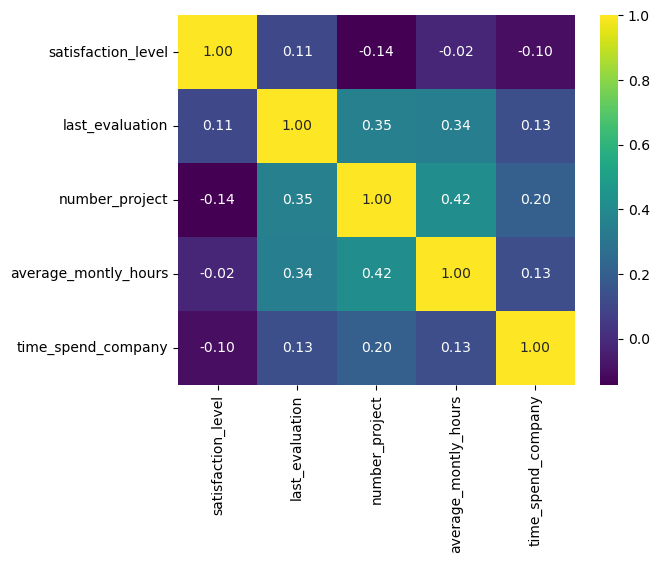

In [58]:
sns.heatmap(df.drop(columns=['department', 'salary','left','Work_accident','promotion_last_5years']).corr(),annot = True, fmt='.2F', cmap='viridis')

## Рассчитайте сколько сотрудников работает в каждом департаменте.

In [59]:
# df['department'].value_counts()
df.groupby('department').count().sort_values('satisfaction_level',ascending=False)['satisfaction_level']

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: satisfaction_level, dtype: int64

## Гистограмма, отражающая распределение сотрудников по зарплатам.

(array([7316., 6446., 1237.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

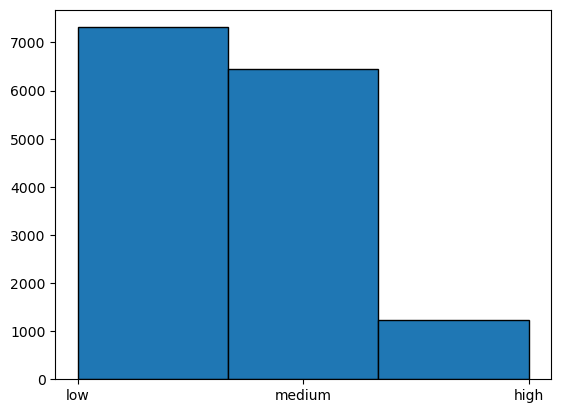

In [60]:
plt.hist(df['salary'],bins = 3,edgecolor='black')

## Строю бар чарт, показывающий распределение сотрудников по зарплатам в каждом департаменте по отдельности

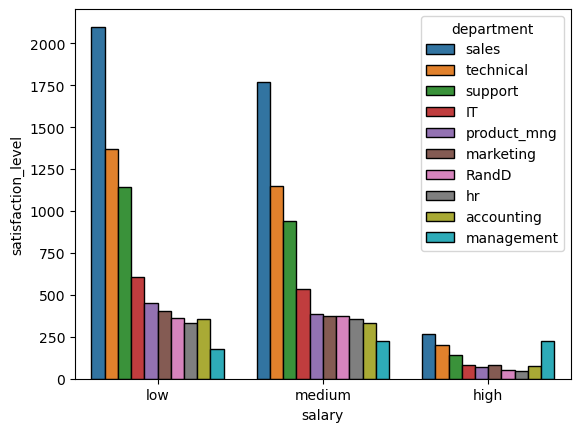

In [61]:
df_d = df.groupby(['department', 'salary']).count()['satisfaction_level'].reset_index().sort_values(['department','satisfaction_level'], ascending=False).sort_values('satisfaction_level', ascending=False)

sns.barplot(x="salary", y="satisfaction_level", hue="department", data=df_d, edgecolor='black')
plt.show()

## Проверяю гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [62]:
t, p = stats.ttest_ind(df[df['salary'] == 'high']['average_montly_hours'], df[df['salary'] == 'low']['average_montly_hours'])
if p > 0.05:
    print('Не отклоняем H0, средние вероятно не различаются')
else:
    print('Отклоняем H0, средние вероятно различаются')
print(f'p-value: {round(p,2)}')

Не отклоняем H0, средние вероятно не различаются
p-value: 0.47


## Рассчитываю следующие метрики среди уволившихся и не уволившихся сотрудников (по отдельности):

 - Доля сотрудников с повышением за последние 5 лет
 - Средняя степень удовлетворенности
 - Среднее количество проектов

In [63]:
df_le = df[df['left'] == 1]
df_nle = df[df['left'] == 0]

In [64]:
# Доля сотрудников с повышением за последние 5 лет

percentage_of_fives_l = (df_le[df_le['promotion_last_5years'] == 1].count() / df_le.shape[0])[0] * 100
percentage_of_fives_n = (df_nle[df_nle['promotion_last_5years'] == 1].count() / df_nle.shape[0])[0] * 100
print(f'Доля сотрудников с повышением за последние 5 лет:\nCреди уволившихся: {round(percentage_of_fives_l,2)}%\nCреди не уволившихся: {round(percentage_of_fives_n,2)}%')

Доля сотрудников с повышением за последние 5 лет:
Cреди уволившихся: 0.53%
Cреди не уволившихся: 2.63%


C:\Users\ggaa3\AppData\Local\Temp\ipykernel_10368\1722409763.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_of_fives_l = (df_le[df_le['promotion_last_5years'] == 1].count() / df_le.shape[0])[0] * 100
C:\Users\ggaa3\AppData\Local\Temp\ipykernel_10368\1722409763.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_of_fives_n = (df_nle[df_nle['promotion_last_5years'] == 1].count() / df_nle.shape[0])[0] * 100


In [65]:
# Средняя степень удовлетворенности
print(f"Средняя степень удовлетворенности:\nCреди уволившихся: {round(df_le['satisfaction_level'].mean(),2)}\nCреди не уволившихся: {round(df_nle['satisfaction_level'].mean(),2)}")

Средняя степень удовлетворенности:
Cреди уволившихся: 0.44
Cреди не уволившихся: 0.67


In [66]:
# Среднее количество проектов
print(f"Среднее количество проектов:\nCреди уволившихся: {round(df_le['number_project'].mean(),2)}\nCреди не уволившихся: {round(df_nle['number_project'].mean(),2)}")

Среднее количество проектов:
Cреди уволившихся: 3.86
Cреди не уволившихся: 3.79


## Строю модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). 

## Оцениваю качество модели на тестовой выборки

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [68]:
X = df.drop(columns=['department', 'salary'])
y = df['left']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
4463,0.78,0.40,6,174,3,0,0,0
14834,0.36,0.52,2,146,3,0,1,0
9358,0.75,0.49,4,246,3,0,0,0
4524,0.78,0.59,4,180,3,0,0,0
1487,0.45,0.52,2,147,3,0,1,0
...,...,...,...,...,...,...,...,...
12545,0.78,1.00,5,236,5,0,1,0
12375,0.73,0.99,5,262,5,0,1,0
293,0.11,0.91,6,308,4,1,1,0
4046,0.71,0.96,4,144,4,0,0,0


In [70]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [71]:
y_predict = pd.DataFrame(model.predict(X_test))
accuracy_score(y_test, model.predict(X_test))

0.7644444444444445

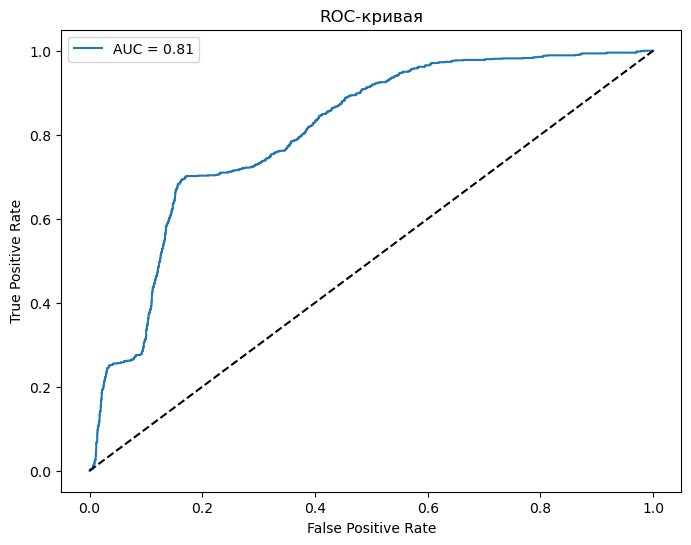

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Линия случайных предсказаний
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

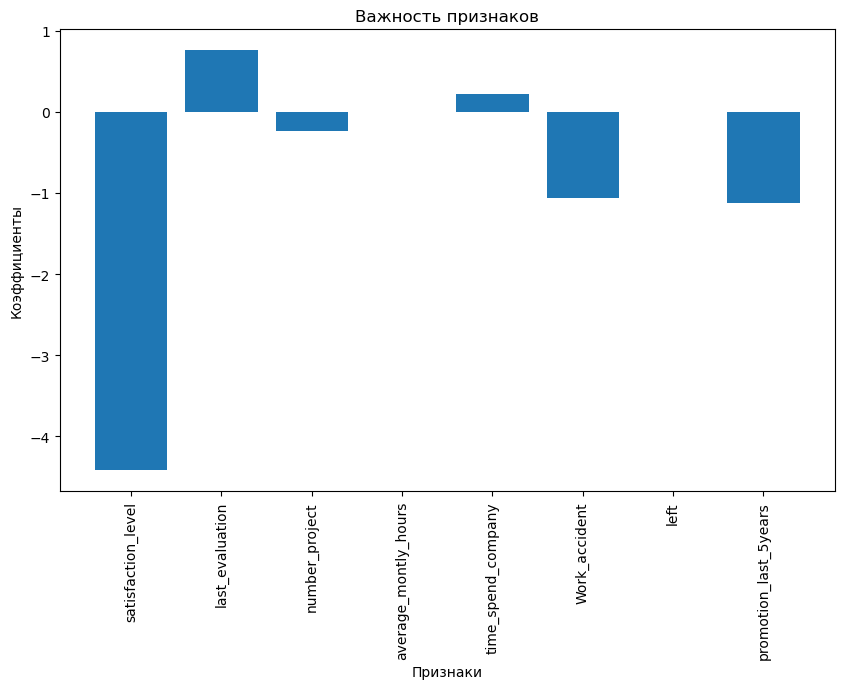

In [73]:
coefficients = model.coef_[0]

plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients)
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.title('Важность признаков')
plt.xticks(rotation=90)
plt.show()
